In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [4]:
login = pd.read_json('logins.json')

In [5]:
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
login.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


Lets first make this into a chronological set

In [8]:
#Sort by time to make it chronological
login.sort_values('login_time')
login.reset_index(drop=True)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [9]:
#split into 15 minute windows as asked
window_15 = pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T')
login_15 = pd.Series(np.zeros(len(window_15)), index=window_15)

In [10]:
#categorization based on 15min intervals, demonstrating for loops and while loops application.
p=0
for i in range(len(login)):
    start = login_15.index[p]
    end = login_15.index[p+1]
    t = login['login_time'][i]
    
    if start < t < end:
        login_15[p] = login_15[p] + 1
    else:
        while (end<t):
            p = p+1
            start = login_15.index[p]
            end = login_15.index[p+1]
        login_15[p] = login_15[p] + 1

print(login_15.head(10))
print(login_15.shape)

1970-01-01 20:00:00     1.0
1970-01-01 20:15:00     6.0
1970-01-01 20:30:00     2.0
1970-01-01 20:45:00    15.0
1970-01-01 21:00:00     0.0
1970-01-01 21:15:00     5.0
1970-01-01 21:30:00     0.0
1970-01-01 21:45:00     3.0
1970-01-01 22:00:00     9.0
1970-01-01 22:15:00     9.0
Freq: 15T, dtype: float64
(9789,)


## Data Visualization

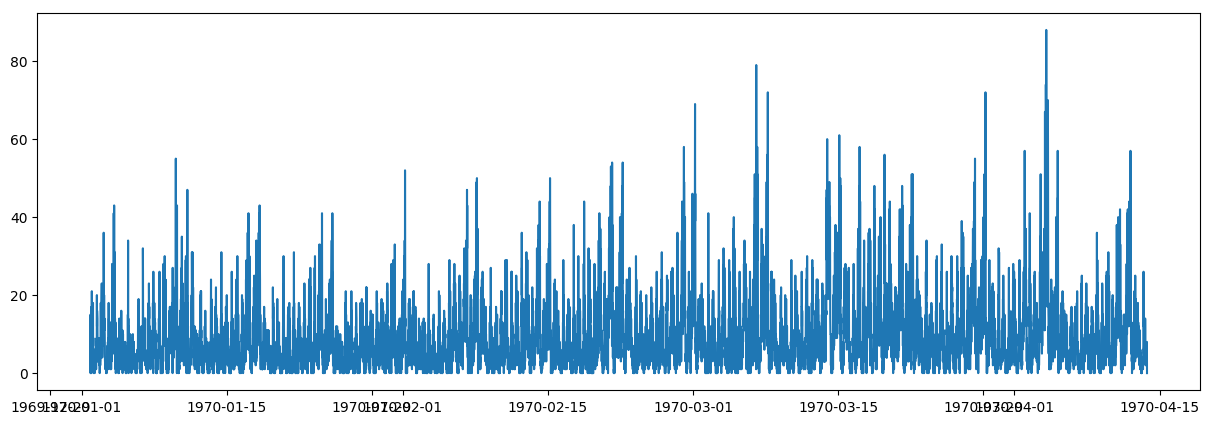

In [11]:
#plot 15minute intervals
plt.figure(figsize=(15,5), dpi=100)
plt.plot(login_15.index,login_15)
plt.show()

We should definately go into further detail here with perhaps an hourly plot and various other time stamps.

Lets use a more simpler tactic to set timestamp frequencies, df.resample would be ideal in this case.

In [12]:
login.set_index('login_time', inplace=True)
login['logins'] = 0
login_15rs = login.resample('15Min').count()
login_hour = login.resample('60Min').count()
login_day = login.resample('D').count()


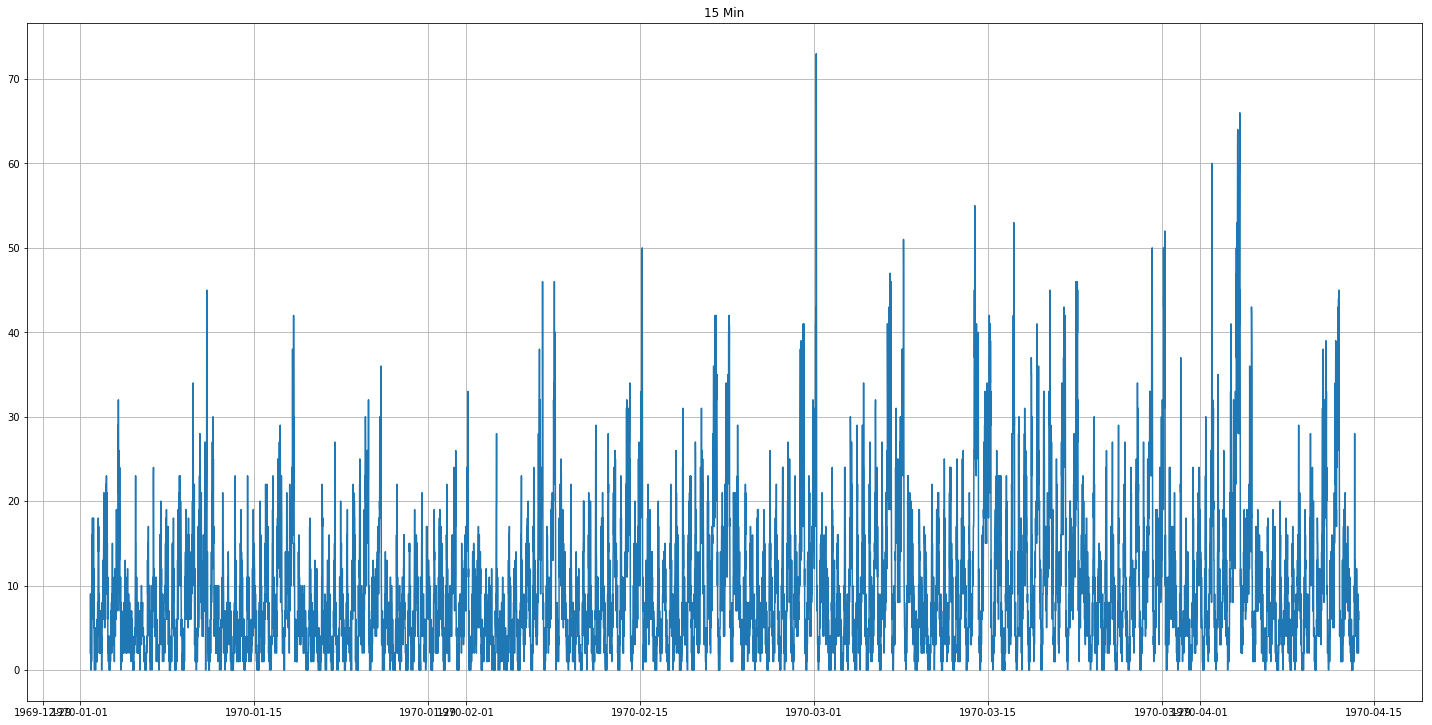

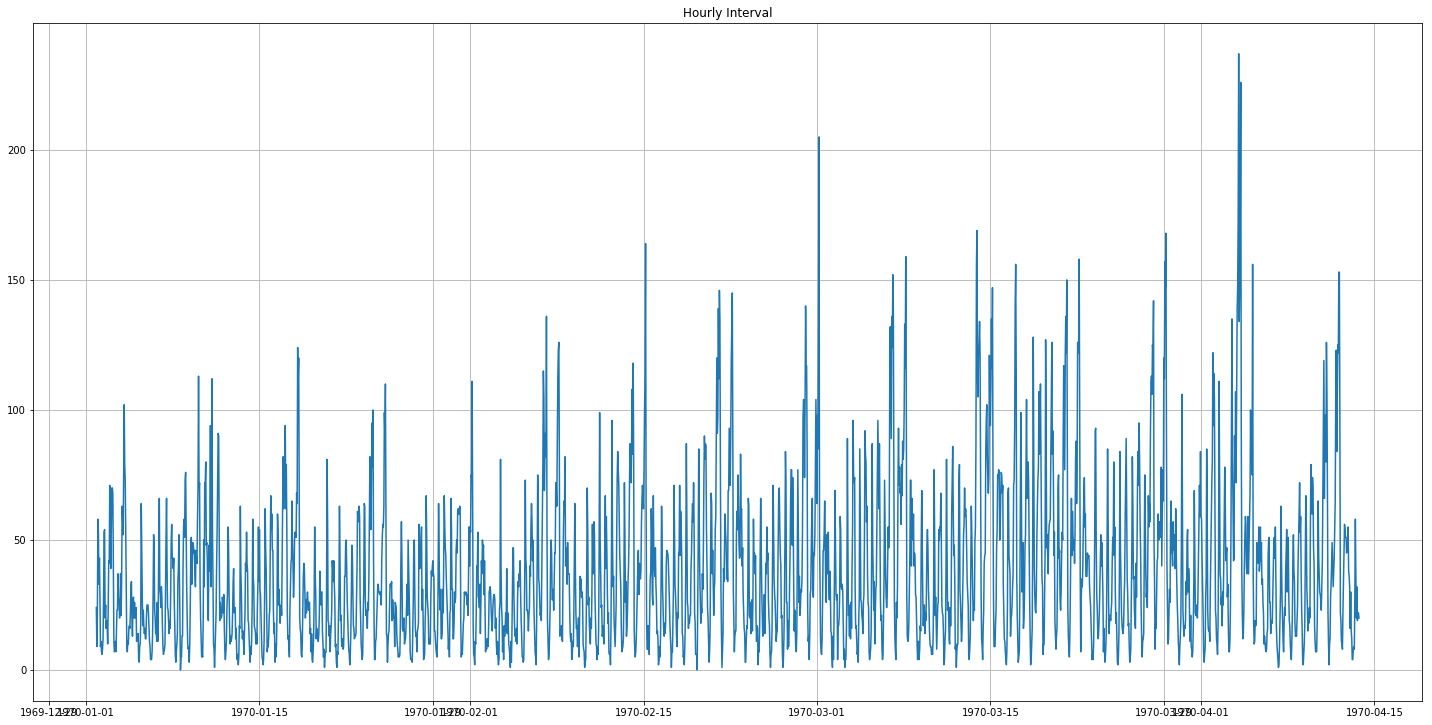

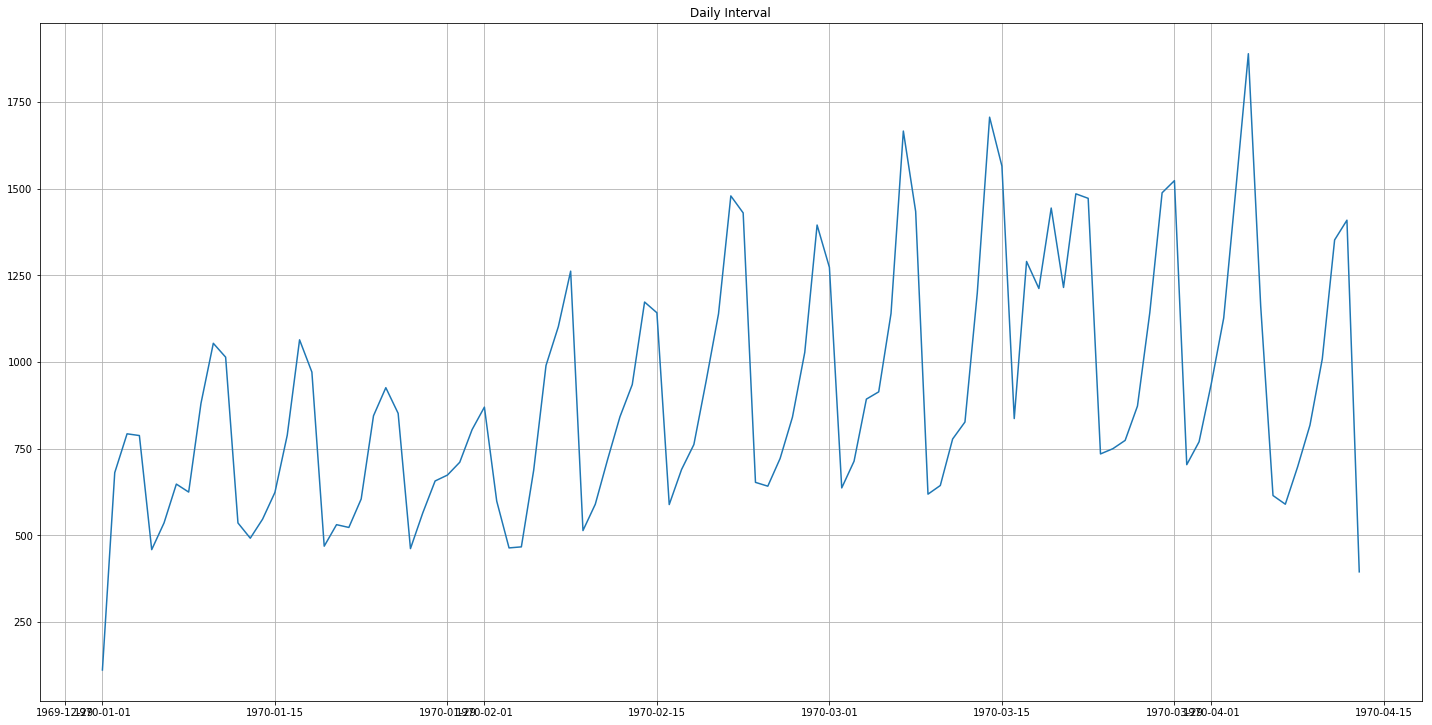

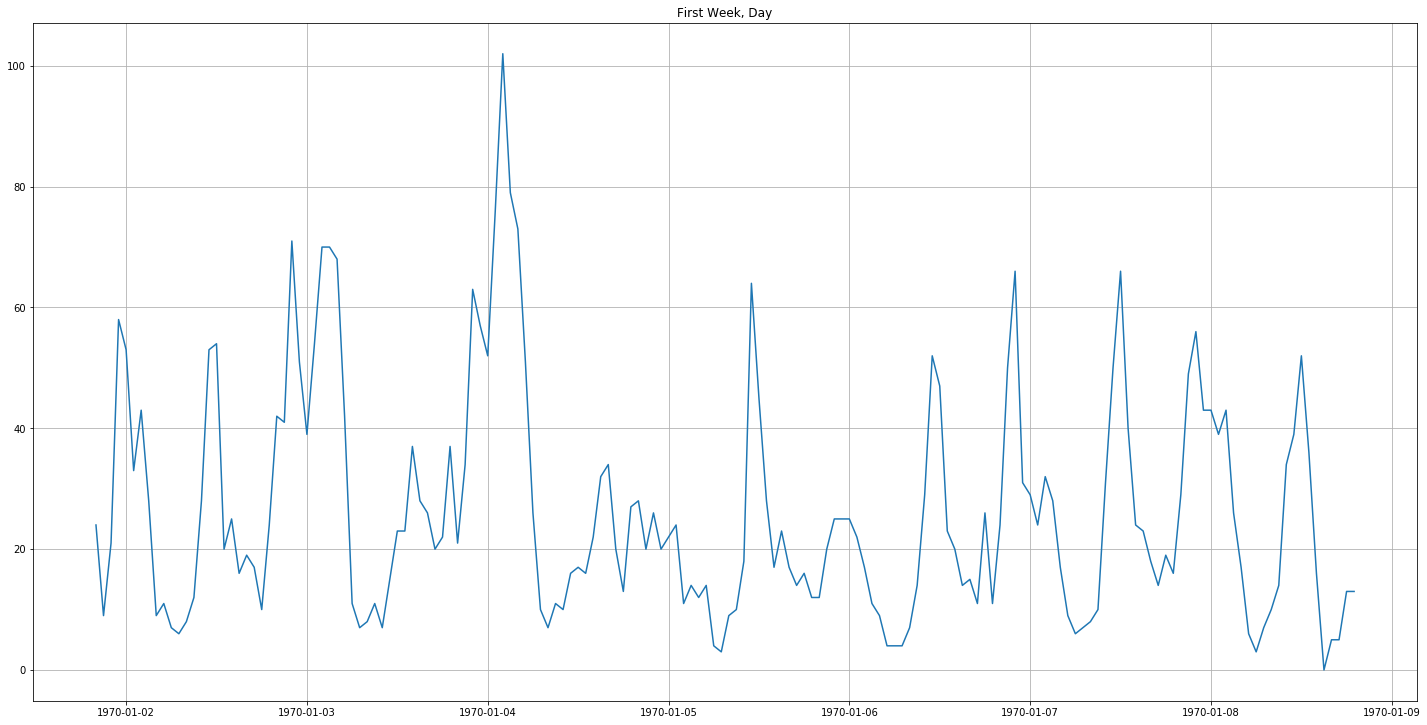

In [13]:
plt.rcParams['figure.figsize'] = (20,10)

plt.plot(login_15rs['logins'])
plt.tight_layout()
plt.title('15 Min')
plt.grid()
plt.show()

plt.plot(login_hour['logins'])
plt.tight_layout()
plt.title('Hourly Interval')
plt.grid()
plt.show()

plt.plot(login_day['logins'])
plt.tight_layout()
plt.title('Daily Interval')
plt.grid()
plt.show()

plt.plot(login_hour['logins'][:168])
plt.tight_layout()
plt.title('First Week, Day')
plt.grid()
plt.show()

The peak times as shown in the graphs are midnight and midday. Monthly the highs were between December to May.

# Part 2 Experiment and Metrics Design

### 1. What Metric Would You Choose as Key Measure of Success and Why?
Since there are reimbursements offered for the toll bridges that could help in the rider retention.

### 2. What experiment will you implement and how?
I would like to apply classification algorithms to the data set, a training and test set, and see how they respond. I am thinking Logistic Regression, KNN, and Decision Trees

### 3. What statistical tests will you conduct?
We would have to compute the p-value by applying the permutation resampling, this would help us identify whether the reimbursment of tolls carries any significance in the driver activity. 

### 4. How would you interpret the results and provide recommendations to the company?
I would have to see how each variable reflects on the final results and determine what role each would play in terms of coefficients. Researching some domain knowledge of the industry and then finding fixes for each variable that carries a negative impact in the business. 

## Part 3 Predictive Modeling

### Data wrangling, munging, and some EDA.

In [14]:
import json

In [15]:
#load json
drivers = json.load(open('ultimate_data_challenge.json'))
#convert to DF
df = pd.DataFrame(drivers)

In [16]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null int64
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


Lets calculate the number of trips the driver last did to see the retention rate.

In [17]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [18]:
df['retained'] = [1 if date > '2014-06-01' else 0 for date in df['last_trip_date']]

In [19]:
df['retained'].describe()

count    50000.00000
mean         0.36620
std          0.48177
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: retained, dtype: float64

There are some text values in the data that we should first convert to numeric values, this will help us in analysis and in machine learning.

In [25]:
#Black Driver Status
black_user = {"False": 0, "True": 1}
df['ultimate_black_user'] = df['ultimate_black_user'].astype('int')

In [27]:
#City Names
city = {"Astapor": 1, "King's Landing": 2, "Winterfell": 3}
df['city'] = [city[x] for x in df['city']]

In [28]:
#Phone Type
phone = {"None":0, "iPhone": 1, "Android": 2}
df['phone'].fillna('None', inplace=True)
df['phone'] = [phone[i] for i in (df['phone'])]

In [29]:
#NaN. We will set these to zero
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(0.0)

In [30]:
#Grouping to retained and not-retained
retained_riders = df[df['retained'] == 1]
non_retained_riders = df[df['retained'] == 0]

#### Lets visualize the variables, with retained and not retained as the two groups, blue will be retained and red will be not retained.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


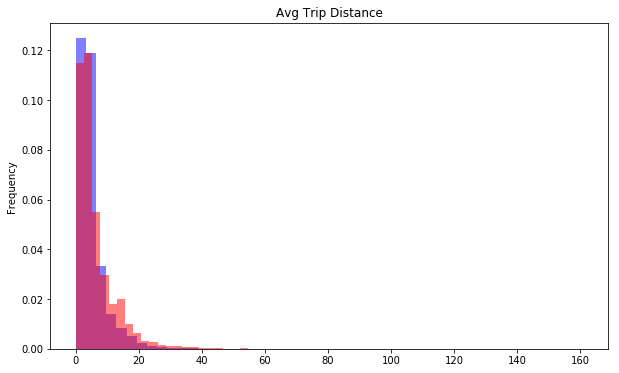

In [35]:
retained_riders['avg_dist'].plot(kind='hist', normed=True, alpha=0.5, bins=50, color='b', figsize=(10,6))
non_retained_riders['avg_dist'].plot(kind='hist', normed=True,alpha=0.5,bins=50,color='r',figsize=(10,6))
plt.title('Avg Trip Distance')
plt.show()

Retained riders had a slightly higher frequency of longer trips

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


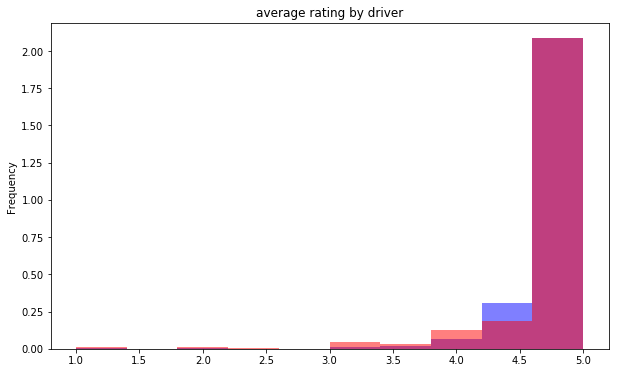

In [36]:
retained_riders['avg_rating_by_driver'].plot(kind='hist', normed=True, alpha=0.5, bins=10, color='b', figsize=(10,6))
non_retained_riders['avg_rating_by_driver'].plot(kind='hist', normed=True, alpha=0.5, bins=10, color='r', figsize=(10,6))
plt.title('average rating by driver')
plt.show()

Non retained riders had more bad reviews than the retained riders. This would be obvious.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


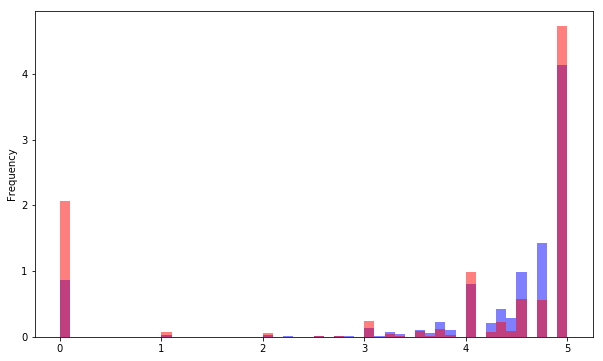

In [38]:
retained_riders['avg_rating_of_driver'].plot(kind='hist', normed=True, alpha=0.5, bins=50, color='b', figsize=(10,6))
non_retained_riders['avg_rating_of_driver'].plot(kind='hist', normed=True, alpha=0.5, bins=50, color='r', figsize=(10,6))
plt.show('average rating of driver')
plt.show()

Non retained drivers had high 0 and 5 ratings, indicating they either loved it or haated it mostly.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


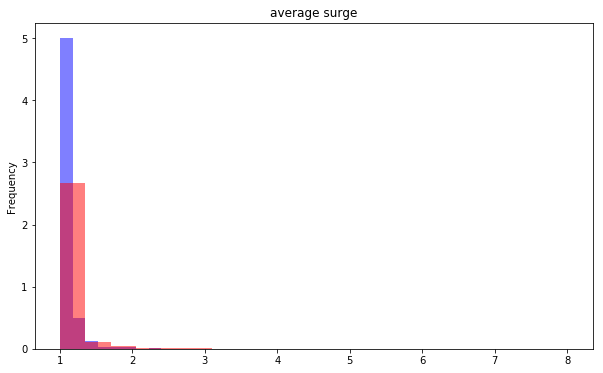

In [40]:
retained_riders['avg_surge'].plot(kind='hist', normed=True, alpha=0.5, bins=20, color='b', figsize=(10,6))
non_retained_riders['avg_surge'].plot(kind='hist', normed=True, alpha=0.5, bins=20, color='r', figsize=(10,6))
plt.title('average surge')
plt.show()

Non retained riders had to deal with more surges than the retained riders.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


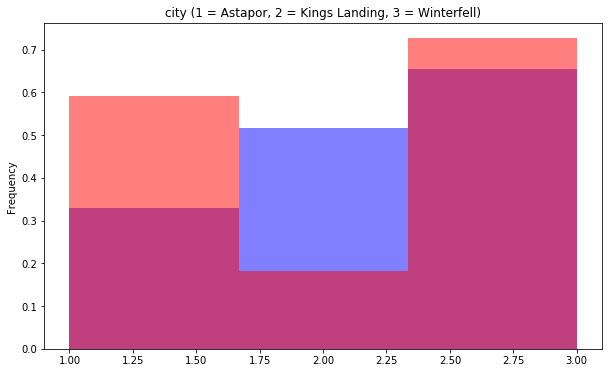

In [41]:
retained_riders['city'].plot(kind='hist', normed=True, alpha=0.5, bins=3, color='b', figsize=(10,6))
non_retained_riders['city'].plot(kind='hist', normed=True, alpha=0.5, bins=3, color='r', figsize=(10,6))
plt.title('city (1 = Astapor, 2 = Kings Landing, 3 = Winterfell)')
plt.show()

Most of the retained riders came from kings landing.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


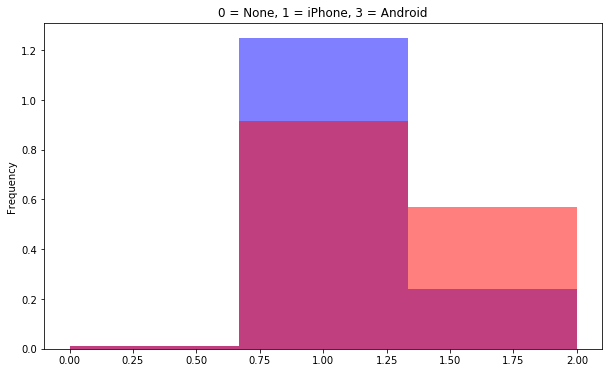

In [42]:
retained_riders['phone'].plot(kind='hist', normed=True, alpha=0.5, bins=3, color='b', figsize=(10,6))
non_retained_riders['phone'].plot(kind='hist', normed=True, alpha=0.5, bins=3, color='r', figsize=(10,6))
plt.title('0 = None, 1 = iPhone, 3 = Android')
plt.show()

iPhones were the majority retention riders.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


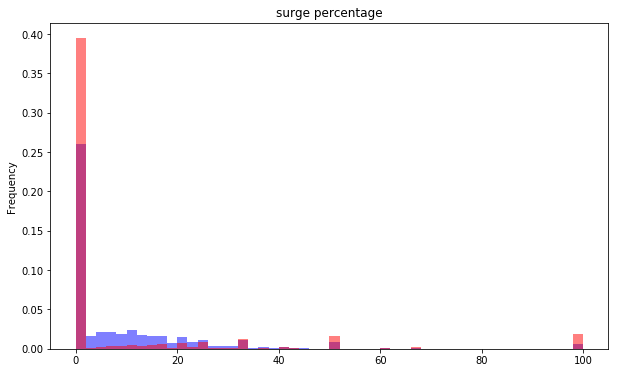

In [43]:
retained_riders['surge_pct'].plot(kind='hist', normed=True, alpha=0.5, bins=50, color='b', figsize=(10,6))
non_retained_riders['surge_pct'].plot(kind='hist', normed=True, alpha=0.5, bins=50, color='r', figsize=(10,6))
plt.title('surge percentage')
plt.show()

Surge percentage was higher for retained riders. 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


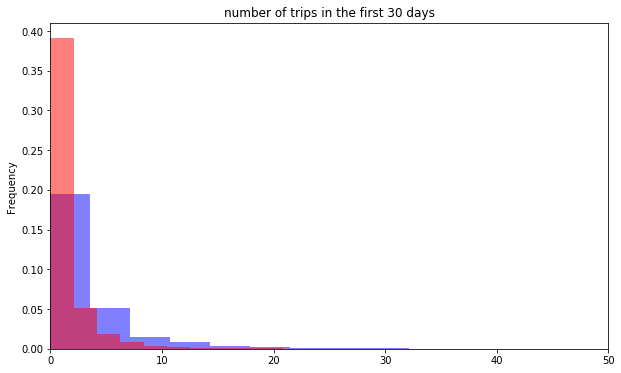

In [44]:
retained_riders['trips_in_first_30_days'].plot(kind='hist', normed=True, alpha=0.5, bins=35, color='b', figsize=(10,6))
non_retained_riders['trips_in_first_30_days'].plot(kind='hist', normed=True, alpha=0.5, bins=35, color='r', figsize=(10,6))
plt.xlim(0,50)
plt.title('number of trips in the first 30 days')
plt.show()

Most non retained riders only took 1 or 2 rides, this was probably the complimentary ride offered. 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


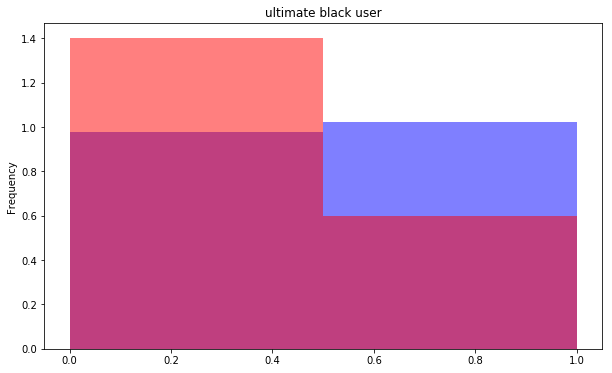

In [45]:
retained_riders['ultimate_black_user'].plot(kind='hist', normed=True, alpha=0.5, bins=2, color='b', figsize=(10,6))
non_retained_riders['ultimate_black_user'].plot(kind='hist', normed=True, alpha=0.5, bins=2, color='r', figsize=(10,6))
plt.title('ultimate black user')
plt.show()

Black user retention is higher, better service may have helped in this. 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


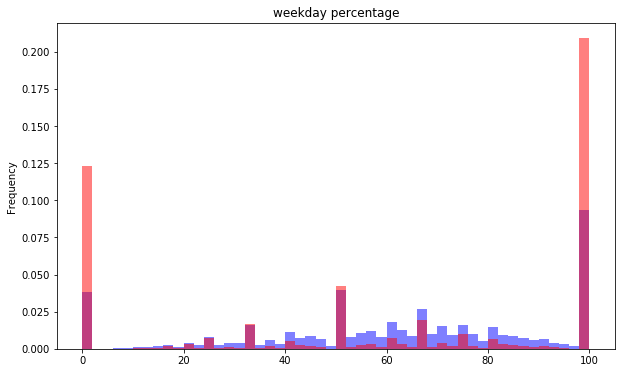

In [46]:
retained_riders['weekday_pct'].plot(kind='hist', normed=True, alpha=0.5, bins=50, color='b', figsize=(10,6))
non_retained_riders['weekday_pct'].plot(kind='hist', normed=True, alpha=0.5, bins=50, color='r', figsize=(10,6))
plt.title('weekday percentage')
plt.show()

Non retained riders had higher frequencies more significant in the 1 and 100 areas. The rest was distributed almost evenly.

Lets see how the percentage fared for retained riders.

In [48]:
len(df[df['retained'] == 1]) / len(df)

0.3662

## Predictive Model

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

In [50]:
cols = ['last_trip_date', 'signup_date', 'retained']
X = df.drop(cols, axis=1).fillna(0)
y = df['retained']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null int64
phone                     50000 non-null int64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int64
weekday_pct               50000 non-null float64
dtypes: float64(6), int64(4)
memory usage: 3.8 MB


In [52]:
#train test split the data and fit and predict the classifier.
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
clf = LogisticRegression()
y_pred = clf.fit(X_train,y_train).predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
#Confusion Matrix, classification report, accuracy score.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred,y_test))
print('')

#coeff
print(clf.coef_[0])
print(list(X.columns.values))

[[6861 1096]
 [2626 1917]]
              precision    recall  f1-score   support

           0       0.72      0.86      0.79      7957
           1       0.64      0.42      0.51      4543

   micro avg       0.70      0.70      0.70     12500
   macro avg       0.68      0.64      0.65     12500
weighted avg       0.69      0.70      0.69     12500

0.70224

[-0.03176436 -0.02225546  0.15178634 -0.36394712  0.19897983 -1.05651382
  0.00669024  0.10440742  0.84613951  0.00122225]
['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'city', 'phone', 'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']


In [55]:
i = 0 
features = []
for feature in X.columns.values:
    features.append((clf.coef_[0][i], feature))
    i += 1
    
sorted(features, reverse=True)

[(0.8461395060621535, 'ultimate_black_user'),
 (0.19897983357942234, 'city'),
 (0.15178633701617422, 'avg_rating_of_driver'),
 (0.10440742484698598, 'trips_in_first_30_days'),
 (0.006690235745989153, 'surge_pct'),
 (0.0012222466817807536, 'weekday_pct'),
 (-0.022255457067497868, 'avg_rating_by_driver'),
 (-0.031764362193097744, 'avg_dist'),
 (-0.3639471220282538, 'avg_surge'),
 (-1.0565138244206163, 'phone')]

As we see here, the Ultimate Black User column has the highest significant with 0.84 coefficient. This would make sense since a more premium service would help rider retention. Following this, city, ratigng, and trips in 30 days are the next three most significant variables in this dataset. 
The most negative impact was with the Phone category. Perhaps since Android users had less retention, there is a lacking in their software UX that needs to be rectified. 